<a href="https://colab.research.google.com/github/vaibhavlokunde/AI-ML/blob/main/Binary_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Binary Classification**: Involves two possible classes or outcomes (e.g., spam vs. not spam). The model predicts one of these two classes.

**Multiclass Classification**: Involves more than two possible classes (e.g., classifying emails as work, personal, or spam). The model predicts one class from multiple options

Classification is a problem of prediction whether something is one thing or another (there can be multiple things as the options).

In [ ]:
import torch
import sklearn #this is scikit learn...its more focused on
#machine learning...whereas Pytorch is more usd for deep learning

**n_samples=1000**: Specifies the dataset will contain 1000 data points.
noise=0.03: Adds a small amount of noise to the data points, making them slightly scattered.

**random_state=42**: Ensures reproducibility by setting a fixed seed for random number generation.

**Syntax**

X, y = make_circles(n_samples=number_of_samples,
                    noise=noise_level,
                    random_state=random_seed)

In [ ]:
from sklearn.datasets import make_circles

#Make 1000 samples

n_samples=1000
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

In [ ]:
len(X),len(y)

(1000, 1000)

In [ ]:
y # you can see that here the values of y as only 1,0 ie its binary classification

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
X[:5],y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

Here u can see that this is binary classification..ie EITHER THIS OR THAT.


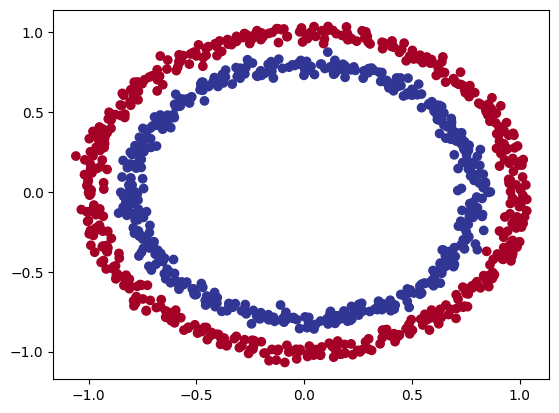

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)


**CHECK INPUT AND OUTPUT SHAPES**

In [ ]:
X.shape,y.shape #Here (1000,2) means that 2 samples of X equals 1 sample of y

((1000, 2), (1000,))

In [ ]:
X_sample=X[0]
y_sample=y[0]

print(f"Value for one sample of X: {X_sample} and the same for y:{y_sample}")
print(f"SHapes for one sample of X: {X_sample.shape} and the same for y:{y_sample.shape}")

Value for one sample of X: [0.75424625 0.23148074] and the same for y:1
SHapes for one sample of X: (2,) and the same for y:()


**Turn data into tensors and create train and test splits**

In [ ]:
type(X)

numpy.ndarray

In [ ]:
# Turn data into tensors
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [ ]:
X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

**Input Data (X, y):** The features (X) and labels (y) of the dataset are split.
test_size=0.2: 20% of the data is allocated for testing, and 80% for training.

**random_state=42:** Ensures reproducibility by fixing the random seed.

**Output:**
X_train, y_train: Features and labels for training (80% of the data).
X_test, y_test: Features and labels for testing (20% of the data).

**Purpose:**
The training set (X_train, y_train) is used to train the model.
The testing set (X_test, y_test) evaluates the model's performance on unseen data.

In [ ]:
#split data into training and test sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)

In [ ]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

#Building a Model

In [ ]:
import torch
from torch import nn

# Make device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

The out_features=5 means the first layer learns 5 "hidden features" from the input data. These features represent learned patterns or abstractions.

More the hidden features...more the model can learn...so thats why we put the out_feature as 5

In [ ]:
# 1.Construct a modell that subclasses nn.Module
from sklearn import datasets
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()


    self.layer_1=nn.Linear(in_features=2,out_features=5)
    # In features of 2nd layer is gng to be the out_features of previous layer
    self.layer_2=nn.Linear(in_features=5,out_features=1)

  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # x->layer_1 ->layer_2 ->output

In [ ]:
model_0=CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.2821, -0.2069],
                      [-0.5900,  0.1792],
                      [ 0.0940, -0.5089],
                      [-0.1099, -0.3386],
                      [-0.2268,  0.6964]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.2383, -0.5892, -0.5975, -0.4329, -0.6127], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.3629, -0.1135,  0.2263,  0.2914, -0.2369]], device='cuda:0')),
             ('layer_2.bias', tensor([0.0340], device='cuda:0'))])

#Replicating the model above using nn.Sequential


In [ ]:
#This is an more easier way....nn.Sequential does it all behind the scenes
#what the above Circle model does
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('0.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('1.bias', tensor([-0.2060], device='cuda:0'))])

In [ ]:
#Make predictions
with torch.inference_mode():
  untrained_pred=model_0(X_test.to(device))
print(f"Length of prediction: {len(untrained_pred)}")
print(f"Shape of prediction: {untrained_pred.shape}")
print(f"first 10 preds:{untrained_pred[:10]}")
print(f"first 10 labels:{y_test[:10]}")

Length of prediction: 200
Shape of prediction: torch.Size([200, 1])
first 10 preds:tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]], device='cuda:0')
first 10 labels:tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')


In [ ]:
X_test[:10],y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

Which loss function or optimizer should you use?

this is problem specific

Eg: For regressino you will use **MAE(Mean absolute error) or MSE(Mean squared error)**

for classification you might want **binary cross entropy or categorial cross entropy**


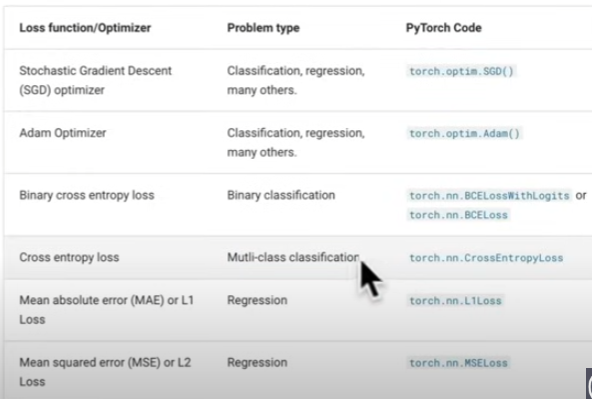

For the loss function we r going to use BECWithLogitsLoss().

BECWithLogitsLoss() is a loss function commonly used in deep learning models for binary classification tasks. It is a combination of Binary Cross Entropy (BCE) and Logits (raw, unnormalized scores output by a model), which allows it to directly accept logits as inputs without requiring a sigmoid activation function beforehand.

BCE measures the difference between the predicted probability (from a sigmoid function applied to logits) and the actual label (0 or 1).
Logits are the raw outputs from the model, before applying the sigmoid function, which makes BECWithLogitsLoss() more efficient by combining the sigmoid activation and binary cross-entropy computation into one operation.
In short, BECWithLogitsLoss() is a loss function used for binary classification that works directly with raw logits, computing both the sigmoid activation and the binary cross-entropy in a numerically stable way.

Sigmoid activation is a mathematical function used in neural networks that maps any real-valued input to a range between 0 and 1. It is defined as:

σ(x)=1/1+e^-x

  is the exponential function.
This makes the sigmoid function ideal for binary classification tasks, where the output represents a probability (ranging from 0 to 1). It's often used in the output layer of binary classification models. However, it can suffer from vanishing gradients for very large or small input values, which can slow down learning during training.

In [ ]:
# Setting up loss function
loss_fn=nn.BCEWithLogitsLoss()  #this has sigmoid activation function built in

# Setting up optimizer
optimizer=torch.optim.SGD(model_0.parameters(),lr=0.1)


In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('0.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('1.bias', tensor([-0.2060], device='cuda:0'))])

This defines a function accuracy_fn that takes two inputs:

y_true: The actual labels (ground truth values).
y_pred: The predicted labels (model output).
Line 1:
python
Copy code
correct = torch.eq(y_true, y_pred).sum().item()
torch.eq(y_true, y_pred) compares the two tensors y_true and y_pred element-wise.

**It returns a tensor of the same shape, where each element is True (1) if the corresponding values in y_true and y_pred are equal, or False (0) if they are not.**
**.sum() sums all the True values (which are 1s) in the tensor, effectively counting how many elements in y_true and y_pred are equal (i.e., the number of correct predictions).**

**.item() extracts the sum as a Python scalar (an integer value), converting it from a tensor to a normal integer.**

So, this line calculates how many predictions are correct.

Line 2:
python
Copy code
acc = correct / len(y_pred)
len(y_pred) returns the total number of elements in the y_pred tensor (the number of predictions made).

correct / len(y_pred) calculates the accuracy by dividing the number of correct predictions by the total number of predictions, which gives a value between 0 and 1 representing the fraction of correct predictions.

Line 3:
python
Copy code
return acc
This returns the calculated accuracy, which is a float representing the proportion of correct predictions out of the total.

Summary:
The function accuracy_fn computes the accuracy of the model by comparing the predicted values (y_pred) with the actual values (y_true), counting how many predictions are correct, and then dividing that by the total number of predictions to get the accuracy as a proportion.

The `accuracy_fn` function is used in binary classification models to measure how well the model's predictions match the true labels. It compares the predicted labels (`y_pred`) with the actual labels (`y_true`), counts the number of correct predictions, and calculates the accuracy by dividing the number of correct predictions by the total number of predictions. Accuracy is a simple and intuitive metric that provides a direct measure of model performance, making it useful for evaluating how often the model correctly classifies instances in binary classification tasks.

In [ ]:
# Calculate accuracy - out of 100 examples, what % does our model get right?

def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=correct/len(y_pred)
  return acc

**RAW LOGITS -> Prediction Probability -> Prediction Labels**

We follow this

In [ ]:
# Train our model
# 1.set up model in train mode
# 2.create a model object
# 3.create loss fn
# 4.zero_grad
# 5.loss.backward()
# 6.optimizer.step()
# 7.model.eval()

# IMP- Our models outputs are going to be raw logits
model_0  # this returns logits

# we convert these logits into prediction probs by passing them to some kind
# of activation function(eg sigmoid for binary crossentropy and softmax for multiclass)
# then we can convert our models prediction probabilities to prediction labels by either rounding them or taking the argmax()




Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]
y_logits # the output to this are called logits

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]], device='cuda:0')

In [ ]:
 y_test[:5]

tensor([1., 0., 1., 0., 1.], device='cuda:0')

In [ ]:
# use sigmoid function on our model to convert logits into prediction probs
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]], device='cuda:0')

**y_pred_probs >= 0.5 (class 1)**

**y_pred_probs < 0.5 (class 0)**

In [ ]:
y_preds=torch.round(y_pred_probs)

In [ ]:
y_pred_labels=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

tensor([True, True, True, True, True], device='cuda:0')


**TRAINING LOOP**

In [ ]:
torch.manual_seed(42)

epochs=100
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)
for epoch in range(epochs):
  model_0.train()

  # Forward pass
  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits)) #turn logits -> pred prob -> pred label


  # Calculate loss
  loss=loss_fn(y_logits,y_train)
  #loss=loss_fn(torch.sigmoid(y_logits),y_train) nn.BCELoss expects prediction prob as input

  #nn.BCEWithLogitsLoss expects raw logits as input
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)


  #Zero grad
  optimizer.zero_grad()

  # loss backward
  loss.backward()

  #optimizer step
  optimizer.step()

  #Testing
  model_0.eval()
  with torch.inference_mode():
    #Forward Loss
    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    #Calculate test loss/acc
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)


    if epoch % 10==0:
      print(f"Epoch:{epoch} | Loss:{loss:.5f},Acc:{acc:.2f} | Test loss:{test_loss:.5f},Test acc:{test_acc:.2f}%")


Epoch:0 | Loss:0.69569,Acc:0.50 | Test loss:0.69721,Test acc:0.50%
Epoch:10 | Loss:0.69403,Acc:0.50 | Test loss:0.69615,Test acc:0.50%
Epoch:20 | Loss:0.69343,Acc:0.46 | Test loss:0.69585,Test acc:0.48%
Epoch:30 | Loss:0.69321,Acc:0.49 | Test loss:0.69577,Test acc:0.47%
Epoch:40 | Loss:0.69312,Acc:0.49 | Test loss:0.69573,Test acc:0.47%
Epoch:50 | Loss:0.69308,Acc:0.50 | Test loss:0.69569,Test acc:0.47%
Epoch:60 | Loss:0.69306,Acc:0.51 | Test loss:0.69564,Test acc:0.47%
Epoch:70 | Loss:0.69305,Acc:0.51 | Test loss:0.69559,Test acc:0.47%
Epoch:80 | Loss:0.69304,Acc:0.51 | Test loss:0.69553,Test acc:0.47%
Epoch:90 | Loss:0.69303,Acc:0.50 | Test loss:0.69547,Test acc:0.47%


You dont need to write this stupid big code...but its a good practice

You can just copy the function from the link given :))

In [ ]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists,skipping download")
else:
  print("Downloading helper functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions,plot_decision_boundary

helper_functions.py already exists,skipping download


#Syntax

plt.subplot(nrows, ncols, index)

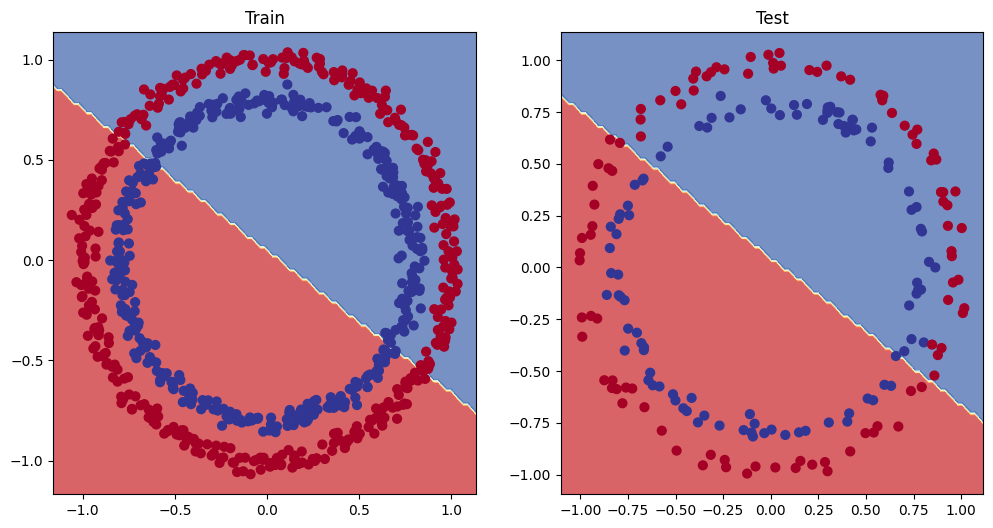

In [ ]:
#Plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

# We see that the results arent getting any better

Improving a model

1) Add more layers-give the model more chances to learn about patterns in the data.

2)Add more hidden units-go from 5 hidden units to 10 units.

3)Fit for longer...run more epochs

4)Change the activation functions

5)Change the learning rate

6)Change the loss function

In [ ]:
 #Adding more hidden units
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)

# This method is also right inside forward method...but we will use
  # z=self.layer_1(x)
  # z=self.layer_2(z)
  # z=self.layer_3(z)

  #The method below is better cuz it speeds up the process
  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1=CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.3041, -0.0775],
                      [-0.5293,  0.6441],
                      [-0.5190,  0.3779],
                      [ 0.2485,  0.2298],
                      [-0.3823,  0.6427],
                      [ 0.1554,  0.0910],
                      [-0.6231,  0.2968],
                      [-0.1061, -0.3239],
                      [ 0.6074,  0.1576],
                      [-0.3912, -0.3579]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.0338,  0.3948, -0.1807, -0.4035, -0.2421, -0.5283,  0.2522,  0.5473,
                      -0.6657,  0.1642], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.1634,  0.0573, -0.1126,  0.1651,  0.1662,  0.1182, -0.0556, -0.0837,
                        0.0338, -0.0559],
                      [-0.0942,  0.2021,  0.2718, -0.0313, -0.0708,  0.0046, -0.0189,  0.0760,
                        0.0886, -0.2872],
                      [-0.1167,  0.266

In [ ]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [ ]:
torch.manual_seed(42)

epochs=1000

X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_logits=model_1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()


  #Testing
  model_1.eval()
  with torch.inference_mode():
    test_logits=torch.sigmoid(model_1(X_test)).squeeze()
    test_pred=torch.round(test_logits)

    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

    if epoch % 100==0:
      print(f"Epoch:{epoch} | Loss:{loss:.5f},Acc:{acc:.2f} | Test loss:{test_loss:.5f},Test acc:{test_acc:.2f}%")



Epoch:0 | Loss:0.69528,Acc:0.51 | Test loss:0.72486,Test acc:0.51%
Epoch:100 | Loss:0.69325,Acc:0.48 | Test loss:0.72382,Test acc:0.51%
Epoch:200 | Loss:0.69309,Acc:0.50 | Test loss:0.72411,Test acc:0.47%
Epoch:300 | Loss:0.69303,Acc:0.51 | Test loss:0.72426,Test acc:0.47%
Epoch:400 | Loss:0.69300,Acc:0.51 | Test loss:0.72437,Test acc:0.47%
Epoch:500 | Loss:0.69299,Acc:0.51 | Test loss:0.72443,Test acc:0.46%
Epoch:600 | Loss:0.69298,Acc:0.52 | Test loss:0.72448,Test acc:0.46%
Epoch:700 | Loss:0.69298,Acc:0.51 | Test loss:0.72451,Test acc:0.46%
Epoch:800 | Loss:0.69298,Acc:0.52 | Test loss:0.72453,Test acc:0.45%
Epoch:900 | Loss:0.69298,Acc:0.51 | Test loss:0.72454,Test acc:0.45%


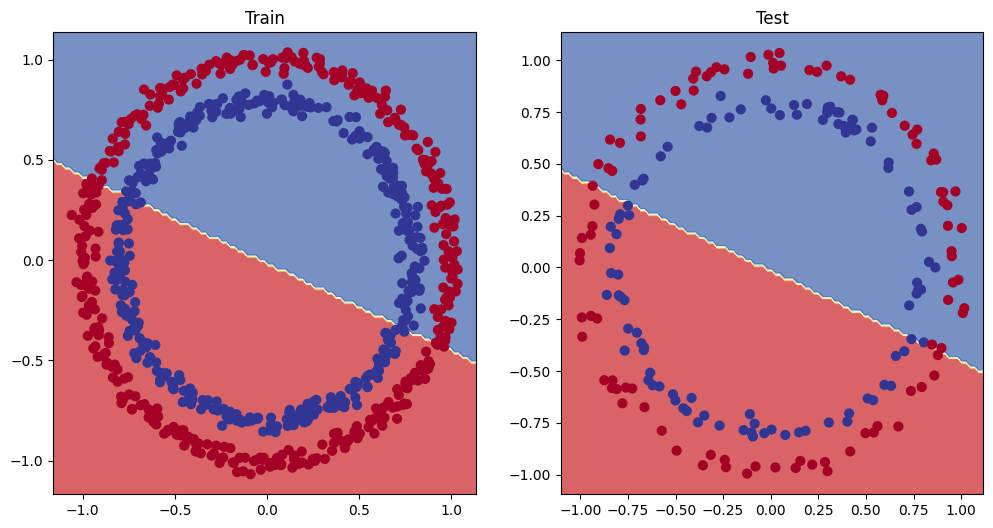

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

#Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem

In [ ]:
#We try to create a straight line...n see if our model can work better w a known straight line

weight=0.7
bias=0.3

start=0
end=1
step=0.01
X_regression=torch.arange(start,end,step).unsqueeze(dim=1)
y_regression=weight*X_regression+bias

print(len(X_regression))
X_regression[:5],y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test splits
train_split=int(0.8*len(X_regression))
X_train_regression,y_train_regression=X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression=X_regression[train_split:],y_regression[train_split:]

len(X_train_regression),len(y_train_regression),len(X_test_regression),len(y_test_regression)

len(X_train_regression),len(y_train_regression),len(X_test_regression),len(y_test_regression)

(80, 80, 20, 20)

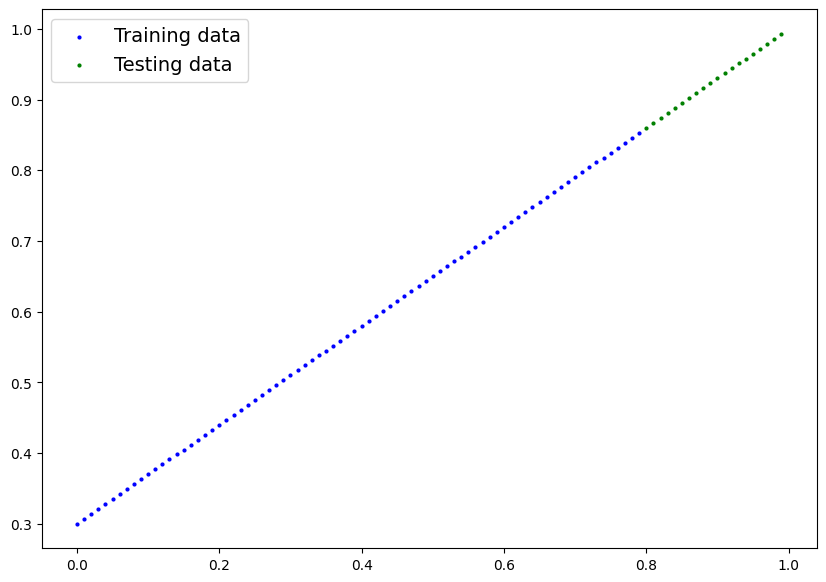

In [ ]:
plot_predictions(train_data=X_train_regression,
               train_labels=y_train_regression,
               test_data=X_test_regression,
               test_labels=y_test_regression,
               predictions=None)

In [ ]:
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

**Adjusting model_1 to fit a straight line**

We know that our linear regression model gives one output for one input.

So we change our model_1 and make their in_features=1 and the last layer out_features=1

In [ ]:
model_2=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

In [ ]:
model_2.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6819],
                      [ 0.8823],
                      [-0.4334],
                      [ 1.0714],
                      [-0.3557],
                      [ 0.2893],
                      [-0.6720],
                      [ 0.6924],
                      [ 1.1016],
                      [-0.8473]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.5008,  0.0061,  0.5983, -0.0510,  0.4255, -0.1627,  0.6983, -0.0451,
                      -0.5220,  0.2853], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0073,  0.0990, -0.1274,  0.3425, -0.2555, -0.1277, -0.1304, -0.1090,
                        0.1350, -0.4168],
                      [ 0.2606, -0.2390,  0.1805,  0.0824, -0.1514,  0.2106, -0.0377,  0.2667,
                        0.1162, -0.1623],
                      [-0.0317, -0.1328,  0.0618,  0.2346,  0.1380, -0.1288,  0.1129,  0.0220,
                        0.1815, -0.1954],
         

In [ ]:
loss_fn=nn.L1Loss()

optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [ ]:
#Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000

X_train_regression,y_train_regression=X_train_regression.to(device),y_train_regression.to(device)
X_test_regression,y_test_regression=X_test_regression.to(device),y_test_regression.to(device)

#Training
for epoch in range(epochs):
  model_2.train()

  y_pred=model_2(X_train_regression)

  loss=loss_fn(y_pred,y_train_regression)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()


  #Testing

  model_2.eval()
  with torch.inference_mode():
    test_pred=model_2(X_test_regression)
    test_loss=loss_fn(test_pred,y_test_regression)
    if epoch % 100==0:
      print(f"Epoch:{epoch} | Loss:{loss:.5f} | Test loss:{test_loss:.5f}")

Epoch:0 | Loss:0.06466 | Test loss:0.12597
Epoch:100 | Loss:0.00743 | Test loss:0.00093
Epoch:200 | Loss:0.00621 | Test loss:0.00123
Epoch:300 | Loss:0.00619 | Test loss:0.00116
Epoch:400 | Loss:0.00617 | Test loss:0.00094
Epoch:500 | Loss:0.00646 | Test loss:0.00138
Epoch:600 | Loss:0.00614 | Test loss:0.00110
Epoch:700 | Loss:0.00612 | Test loss:0.00103
Epoch:800 | Loss:0.00641 | Test loss:0.00149
Epoch:900 | Loss:0.00639 | Test loss:0.00118


In [ ]:
# Turn on evaluation mode

model_2.eval()

with torch.inference_mode():
  y_preds=model_2(X_test_regression)

plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_label=y_test_regression,
                 predictions=y_preds)

TypeError: plot_predictions() got an unexpected keyword argument 'test_label'

We can see that our model is learning with linear model

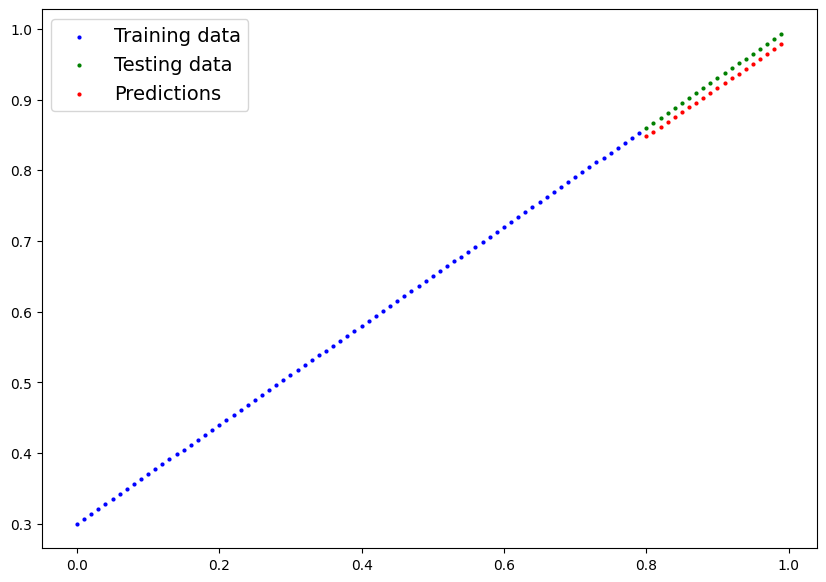

In [ ]:
# The above error occurred bcuz plot predictions uses cpu....and all of our variables are in cuda

model_2.eval()

with torch.inference_mode():
    y_preds = model_2(X_test_regression).cpu()  # Move predictions to the CPU

plot_predictions(
    train_data=X_train_regression.cpu(),
    train_labels=y_train_regression.cpu(),
    test_data=X_test_regression.cpu(),
    test_labels=y_test_regression.cpu(),
    predictions=y_preds
)

## The missing piece: non-linearity

What patterns could you draw if you were given an infinite amout of a straight and non straight line

or a large number of linear and non-linear functions

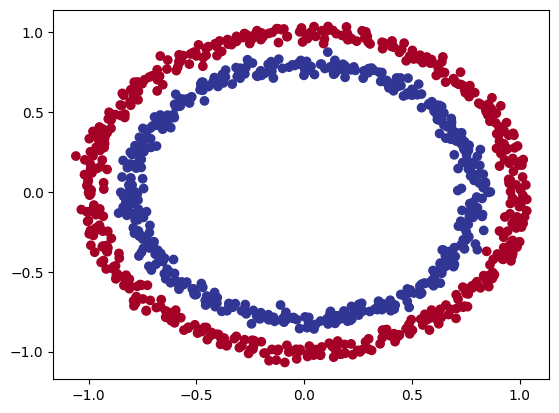

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples=1000

X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
#Convert data to tensors and then to train and test splits

import torch
from sklearn.model_selection import train_test_split

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2,
                                               random_state=42)

X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

#Building a model with non-linearity

Linear=straight linear

Non linear=non-straight lines

nn.ReLU() applies the Rectified Linear Unit activation function, which outputs:

*   x if x >0
*   0 if x< 0

It introduces non-linearity, helping the model learn complex patterns.

In [ ]:
# Build a model with non linear function

from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)

    #this is a non linear function
    self.relu=nn.ReLU()

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3=CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup Loss and optimizer

loss_fn=nn.BCEWithLogitsLoss()

optimizer=torch.optim.SGD(model_3.parameters(),lr=0.1)


In [ ]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

#Training model with non-linearity

In [ ]:
#Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000

X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  model_3.train()

  y_logits=model_3(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)

  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #Testing Loop
  model_3.eval()
  with torch.inference_mode():
    test_logits=model_3(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

  if epoch % 100==0:
    print(f"Epoch:{epoch} | Loss:{loss:.4f}, Acc:{acc:.2f} | Test loss:{test_loss:.4f},Test acc:{test_acc:.2f}%")

Epoch:0 | Loss:0.6929, Acc:0.50 | Test loss:0.6931,Test acc:0.50%
Epoch:100 | Loss:0.6911, Acc:0.53 | Test loss:0.6910,Test acc:0.53%
Epoch:200 | Loss:0.6898, Acc:0.53 | Test loss:0.6894,Test acc:0.56%
Epoch:300 | Loss:0.6879, Acc:0.53 | Test loss:0.6872,Test acc:0.56%
Epoch:400 | Loss:0.6851, Acc:0.53 | Test loss:0.6841,Test acc:0.56%
Epoch:500 | Loss:0.6810, Acc:0.53 | Test loss:0.6794,Test acc:0.56%
Epoch:600 | Loss:0.6751, Acc:0.55 | Test loss:0.6728,Test acc:0.56%
Epoch:700 | Loss:0.6665, Acc:0.58 | Test loss:0.6631,Test acc:0.59%
Epoch:800 | Loss:0.6514, Acc:0.64 | Test loss:0.6474,Test acc:0.68%
Epoch:900 | Loss:0.6232, Acc:0.74 | Test loss:0.6211,Test acc:0.79%


You can see that the model is performing better|

#Now evaluating model with non linear functions

In [ ]:
model_3.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

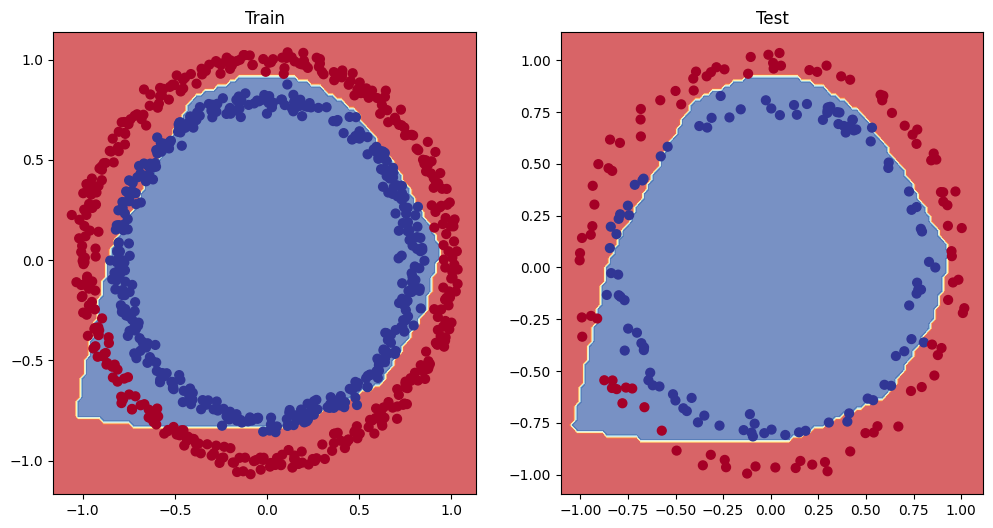

In [ ]:
#Plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)
